# Etape 1.1 : Essais de clustering

## Ces essais n'étaient pas concluant mais maritent tout de même d'être notés.

Import des librairies

In [2]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns, prince
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

Dataset ré-importé à chaque analyse

## PCA

!! PCA ne fonctionne pas avec des données catégoriques !!

In [44]:
dataset = pd.read_pickle('./Datasets/complete_dataset_with_scaling.pkl')
# drop categorical columns
for col in dataset.columns:
    if dataset[col].dtype == 'object' or dataset[col].dtype == 'category':
        dataset = dataset.drop(col, axis=1)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dataset.drop('Attrition', axis=1))
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, dataset[['Attrition']]], axis = 1)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.24695791 0.10764391]


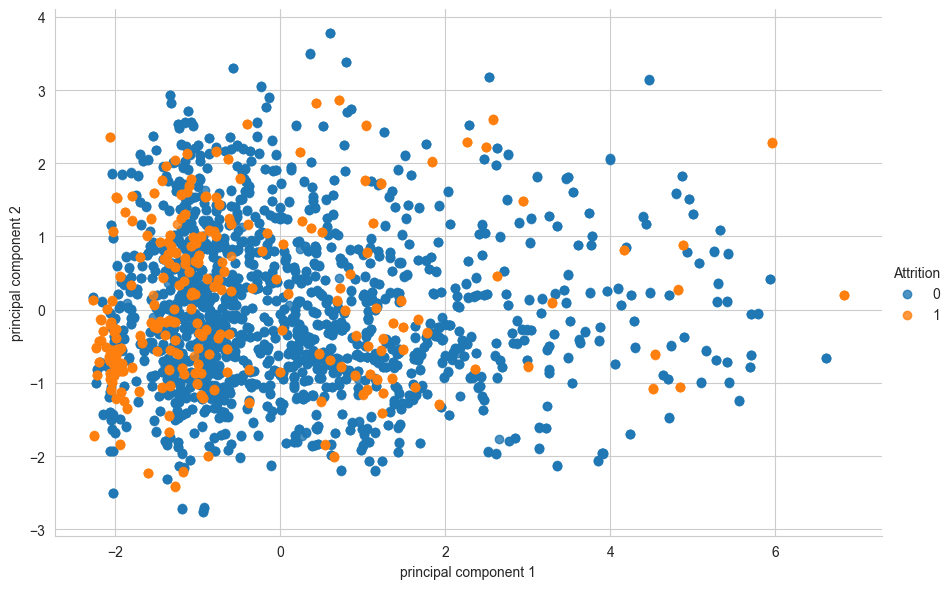

In [46]:
# Visualisation des données
sns.set_style('whitegrid')
sns.lmplot(x = 'principal component 1',y = 'principal component 2', data=finalDf, hue='Attrition', fit_reg=False, height=6, aspect=1.5)
plt.show()

## t-SNE

!! t-SNE ne fonctionne pas avec des données catégoriques !!

In [98]:
dataset = pd.read_pickle('./Datasets/complete_dataset_no_scaling.pkl')
dataset_without_cat = dataset.copy()
# drop categorical columns
for col in dataset_without_cat.columns:
    if dataset_without_cat[col].dtype == 'object' or dataset_without_cat[col].dtype == 'category':
        dataset_without_cat = dataset_without_cat.drop(col, axis=1)

tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=1000, learning_rate=50)
tsne_results = tsne.fit_transform(dataset_without_cat)
dataset['tsne-2d-one'] = tsne_results[:,0]
dataset['tsne-2d-two'] = tsne_results[:,1]

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 4409 samples in 0.007s...
[t-SNE] Computed neighbors for 4409 samples in 0.162s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4409
[t-SNE] Computed conditional probabilities for sample 2000 / 4409
[t-SNE] Computed conditional probabilities for sample 3000 / 4409
[t-SNE] Computed conditional probabilities for sample 4000 / 4409
[t-SNE] Computed conditional probabilities for sample 4409 / 4409
[t-SNE] Mean sigma: 514.782176
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.674828
[t-SNE] KL divergence after 1000 iterations: 0.205177


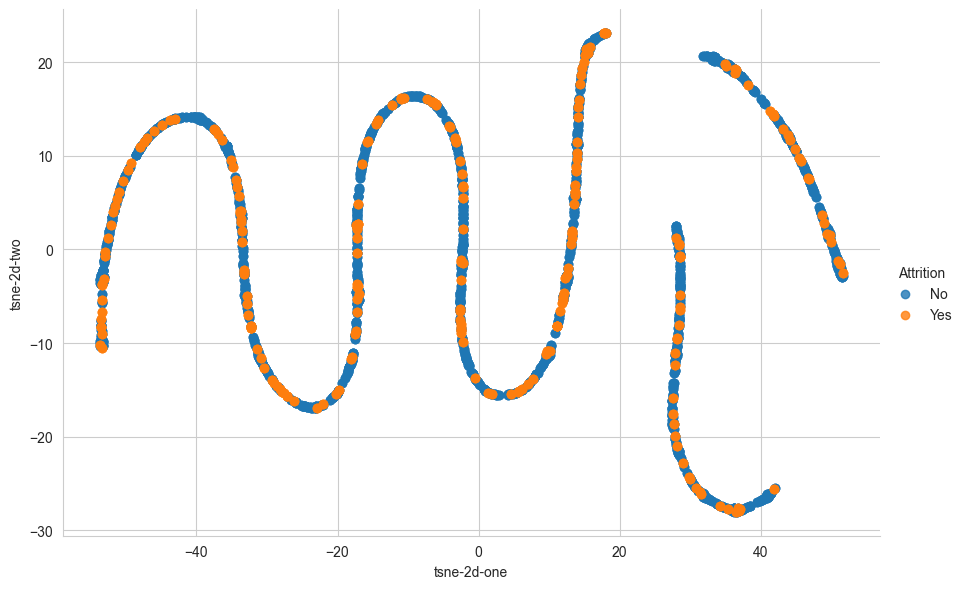

In [99]:
# Visualisation des données
sns.set_style('whitegrid')
sns.lmplot(x='tsne-2d-one', y='tsne-2d-two', data=dataset, hue='Attrition', fit_reg=False, height=6,
           aspect=1.5)
plt.show()

## UMAP

In [100]:
dataset = pd.read_pickle('./Datasets/complete_dataset_no_scaling.pkl')
dataset_without_cat = dataset.copy()
# drop categorical columns
for col in dataset_without_cat.columns:
    if dataset_without_cat[col].dtype == 'object' or dataset_without_cat[col].dtype == 'category':
        dataset_without_cat = dataset_without_cat.drop(col, axis=1)

reducer = umap.UMAP()
umap_results = reducer.fit_transform(dataset_without_cat)
umapDf = pd.DataFrame(data = umap_results, columns = ['umap component 1', 'umap component 2'])
finalDf = pd.concat([umapDf, dataset[['Attrition']]], axis = 1)

C:\Users\Nyu\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


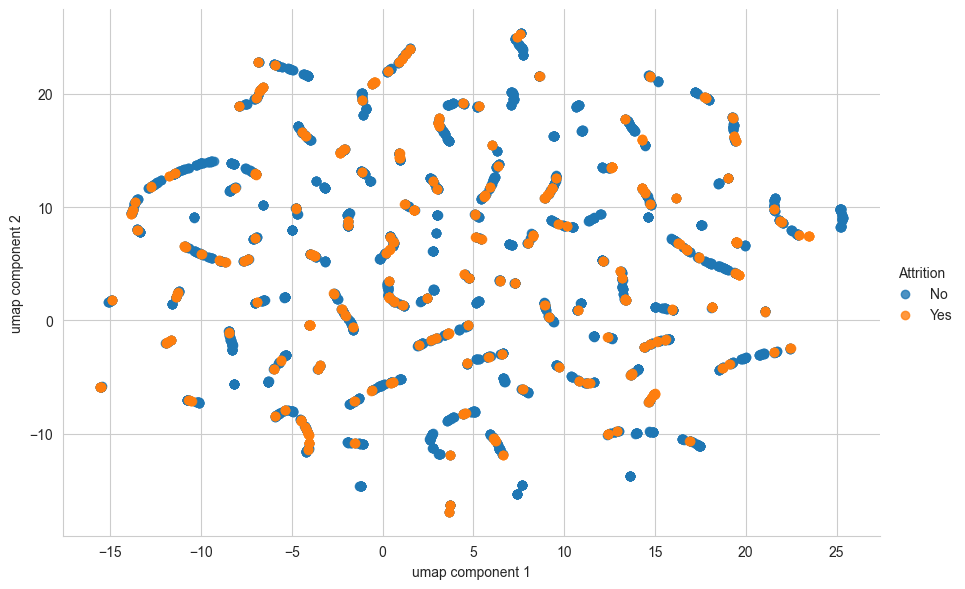

In [101]:
# Visualisation des données
sns.set_style('whitegrid')
sns.lmplot(x = 'umap component 1',y = 'umap component 2', data=finalDf, hue='Attrition', fit_reg=False, height=6, aspect=1.5)
plt.show()

## MCA : Multidimensional Correspondence Analysis

!!! Sans données numériques !!!

In [33]:
dataset = pd.read_pickle('./Datasets/complete_dataset_no_scaling.pkl')#drop monthly income
# drop numerical columns
for col in dataset.columns:
    if dataset[col].dtype == 'int64' or dataset[col].dtype == 'float64':
        dataset = dataset.drop(col, axis=1)
dataset

,Attrition,BusinessTravel,Department,Education,EducationField,JobLevel,JobRole,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,No,Travel_Rarely,Sales,BAC+2,Life Sciences,1,Healthcare Representative,Importante,Excellent,Élevé,Très élevé,Satisfaisant
1,Yes,Travel_Frequently,Research & Development,BAC,Life Sciences,1,Research Scientist,Moyenne,Au delà des attentes,Élevé,Moyen,Excellent
2,No,Travel_Frequently,Research & Development,BAC+5,Other,4,Sales Executive,Importante,Excellent,Moyen,Moyen,Mauvais
3,No,Non-Travel,Research & Development,Doctorat,Life Sciences,3,Human Resources,Moyenne,Excellent,Très élevé,Très élevé,Très satisfaisant
4,No,Travel_Rarely,Research & Development,BAC,Medical,1,Sales Executive,Importante,Excellent,Très élevé,Faible,Très satisfaisant
...,...,...,...,...,...,...,...,...,...,...,...,...
4404,No,Travel_Rarely,Sales,BAC+3,Other,2,Human Resources,Moyenne,Excellent,Élevé,Très élevé,Très satisfaisant
4405,No,Travel_Rarely,Research & Development,BAC+5,Medical,1,Research Scientist,Importante,Excellent,Très élevé,Faible,Très satisfaisant
4406,No,Travel_Rarely,Research & Development,BAC+5,Medical,1,Laboratory Technician,Moyenne,Excellent,Très élevé,Très élevé,Très satisfaisant
4407,No,Travel_Rarely,Research & Development,BAC+2,Life Sciences,2,Sales Executive,Importante,Au delà des attentes,Faible,Élevé,Très satisfaisant


In [34]:
mca = prince.MCA(
    n_components=5,
    n_iter=10,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
mca = mca.fit(dataset)

mca.eigenvalues_summary

C:\Users\Nyu\lib\site-packages\prince\mca.py:27: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  one_hot = pd.get_dummies(X)


,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.143,4.39%,4.39%
1,0.131,4.04%,8.43%
2,0.108,3.31%,11.74%
3,0.102,3.14%,14.88%
4,0.099,3.05%,17.93%


In [35]:
mca.row_coordinates(dataset).head()

C:\Users\Nyu\lib\site-packages\prince\mca.py:38: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return super().row_coordinates(pd.get_dummies(X))


,0,1,2,3,4
0,-0.217252,0.183687,-0.298446,0.135843,0.345913
1,-0.031485,-0.224180,0.822074,0.788851,-0.042407
2,-0.046486,-0.103206,0.657573,-0.265262,0.088892
3,-0.188547,-0.409131,-0.602553,-0.090464,-0.555597
4,0.019681,-0.325591,-0.027045,0.573007,0.039770


In [36]:
mca.column_coordinates(dataset).head()

C:\Users\Nyu\lib\site-packages\prince\mca.py:44: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return super().column_coordinates(pd.get_dummies(X))


,0,1,2,3,4
Attrition_No,-0.101883,-0.033543,-0.275614,0.056389,0.018705
Attrition_Yes,0.529909,0.174464,1.433503,-0.293286,-0.097285
BusinessTravel_Non-Travel,-0.287196,-0.566460,-0.127637,0.571174,-0.448913
BusinessTravel_Travel_Frequently,-0.197216,0.213118,0.812652,-0.059668,-0.203860
BusinessTravel_Travel_Rarely,0.093710,0.024874,-0.197531,-0.066318,0.118740


In [37]:
mca.plot(
    dataset,
    x_component=0,
    y_component=1
)

C:\Users\Nyu\lib\site-packages\prince\mca.py:38: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return super().row_coordinates(pd.get_dummies(X))
C:\Users\Nyu\lib\site-packages\prince\mca.py:44: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return super().column_coordinates(pd.get_dummies(X))


alt.Chart(...)

In [17]:
mca.row_contributions_.head().style.format('{:.0%}')

,0,1,2,3,4
0,0%,0%,0%,0%,0%
1,0%,0%,0%,0%,0%
2,0%,0%,0%,0%,0%
3,0%,0%,0%,0%,0%
4,0%,0%,0%,0%,0%


In [18]:
mca.column_contributions_.head().style.format('{:.0%}')

,0,1,2,3,4
DistanceFromHome,27%,59%,2%,0%,0%
NumCompaniesWorked,1%,6%,28%,17%,2%
PercentSalaryHike,5%,10%,7%,0%,0%
StockOptionLevel,0%,0%,0%,0%,0%
TotalWorkingYears,12%,0%,42%,3%,1%


# FAMD

In [19]:
dataset = pd.read_pickle('./Datasets/complete_dataset_no_scaling.pkl')

In [20]:
famd = prince.FAMD(
    n_components=2,
    n_iter=100,
    copy=True,
    check_input=True,
    random_state=42,
    engine="sklearn"
)
famd = famd.fit(dataset)

In [21]:
famd.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,10.297,4.20%,4.20%
1,9.472,3.87%,8.07%


In [22]:
famd.row_coordinates(dataset).head()

component,0,1
0,-1.727230,1.652856
1,-0.254529,-2.020694
2,-0.310211,-0.928620
3,-1.727867,-3.305723
4,0.116553,-2.695294


In [23]:
famd.plot(
    dataset.head(100),
    x_component=0,
    y_component=1,
)

alt.LayerChart(...)